<a href="https://colab.research.google.com/github/Shumin326/Movie_Recommendation/blob/master/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Module 1: movie recommendation system

In [0]:
path = 'gdrive/My Drive/ESE 545/proj3/recommendationMovie.csv'
df_org = pd.read_csv(path,header=None)

In [0]:
def plot(regret,alg):
    fig,ax = plt.subplots(figsize=(10,7))
    # use regret = R/T, comment this if choose to use regret = R
    ax.plot(np.arange(len(regret)),regret/(np.arange(len(regret))+1))
    # uncomment this if choose to use regret=R
    # ax.plot(np.arange(len(regret)),regret))
    ax.set_xlabel('time')
    ax.set_ylabel('regret')
    ax.set_title('regret curve for ' + alg +' algorithm')
    plt.show()

## partial feedback
### stochastic method
- ucb
- thompson sampling

In [0]:
def ucb_partial(df_org):
    mu = np.zeros(len(df_org))
    n = np.zeros(len(df_org),dtype = int)
    loss = 0
    arm = np.zeros(df_org.shape[1],dtype = int)

    # try all arms once
    for i in range(len(df_org)):
        n[i] += 1
        mu[i] += df_org.iloc[i,i]
        loss += 1 - df_org.iloc[i,i]
        arm[i] = i
    for t in range(df_org.shape[0],df_org.shape[1]):
        ucb = mu+np.sqrt(2*np.log(t)/n)
        idx = np.argmax(ucb)
        r = df_org.iloc[idx,t]
        n[idx] += 1
        mu[idx] += 1/n[idx]*(r-mu[idx])
        loss += 1 - r
        arm[t] = idx
    return arm,mu,loss

In [0]:
def Tsap_partial(df_org):
    loss = 0
    arm = np.zeros(df_org.shape[1],dtype = int)
    s = np.zeros(len(df_org))
    f = np.zeros(len(df_org))
    for t in range(df_org.shape[1]):
        samples = np.random.beta(s+1,f+1)
        idx = np.argmax(samples)
        arm[t] = idx
        r = df_org.iloc[idx,t]
        loss += 1-r
        if r:
            s[idx] += 1
        else:
            f[idx] += 1
    mu = (s+1)/(s+f+2)
    return arm,mu,loss

In [0]:
def evaluate_sto(arm,mu,alg):
    mu_opt = max(mu)
    mu_opt_idx = np.argmax(mu)
    regret = 0
    regrets = []
    for i in arm:
        regret += mu_opt - mu[i]
        regrets.append(regret)
    loss_opt = df_org.shape[1]-df_org.iloc[mu_opt_idx].sum()
    print('optimal loss:',loss_opt)
    plot(regrets,alg)

total loss: 14744.0
optimal loss: 8983.0


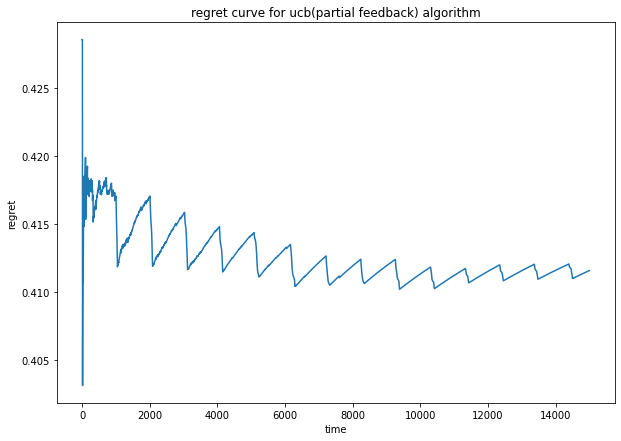

In [255]:
arm,mu,loss = ucb_partial(df_org)
print('total loss:',loss)
evaluate_sto(arm,mu,'ucb(partial feedback)')

total loss: 14203.0
optimal loss: 8825.0


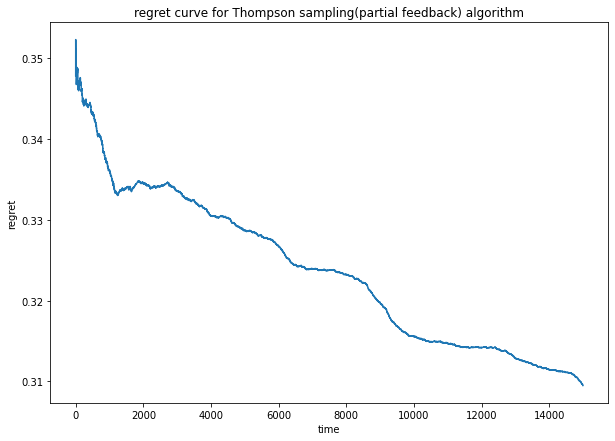

In [250]:
arm,mu,loss = Tsap_partial(df_org)
print('total loss:',loss)
evaluate_sto(arm,mu,'Thompson sampling(partial feedback)')

### non-stochastic method

In [0]:
def evaluation_adv(losses,alg):
    L_opt = np.zeros(df_org.shape[1])
    for t in range(df_org.shape[1]):
        L_opt[t] = t+1 - max(df_org.iloc[:,:(t+1)].sum(1))
    regrets = losses - L_opt
    print('optimal loss:',L_opt[-1])
    plot(regrets,alg)

In [0]:
def exp3_partial(df_org):
    pr = np.ones(df_org.shape[0])/df_org.shape[0]    # initialize distribution
    L_hat = np.zeros(df_org.shape[0])
    loss = 0
    losses = np.zeros(df_org.shape[1])
    for t in range(df_org.shape[1]):
        idx = np.random.choice(np.arange(df_org.shape[0]), p=pr)
        l_hat = (1-df_org.iloc[idx,t])/pr[idx]
        L_hat[idx] += l_hat 
        yita = np.sqrt(np.log(df_org.shape[0])/((t+1)*df_org.shape[0]))
        pr = np.exp(-yita*L_hat)
        pr = pr/sum(pr)
        loss += 1 - df_org.iloc[idx,t]
        losses[t] = loss
    return losses

In [257]:
losses = exp3_partial(df_org)
print('total loss:',losses[-1])

total loss: 14616.0


0
150
300
450
600
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
3000
3150
3300
3450
3600
3750
3900
4050
4200
4350
4500
4650
4800
4950
5100
5250
5400
5550
5700
5850
6000
6150
6300
6450
6600
6750
6900
7050
7200
7350
7500
7650
7800
7950
8100
8250
8400
8550
8700
8850
9000
9150
9300
9450
9600
9750
9900
10050
10200
10350
10500
10650
10800
10950
11100
11250
11400
11550
11700
11850
12000
12150
12300
12450
12600
12750
12900
13050
13200
13350
13500
13650
13800
13950
14100
14250
14400
14550
14700
14850
optimal loss: 8825.0


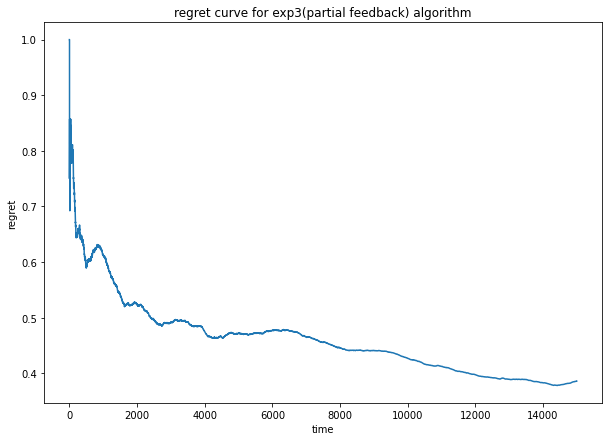

In [258]:
evaluation_adv(losses,'exp3(partial feedback)')

## full feedback
### stochastic method

In [0]:
def ucb_full(df_org):
    mu = np.zeros(len(df_org))
    n = np.zeros(len(df_org),dtype = int)
    loss = 0
    arm = np.zeros(df_org.shape[1])

    # try all arms once
    for i in range(len(df_org)):
        n[i] += 1
        mu += 1/(i+1)*(df_org.iloc[:,i]-mu)
        loss += 1 - df_org.iloc[i,i]
        arm[i] = i
    for t in range(df_org.shape[0],df_org.shape[1]):
        ucb = mu+np.sqrt(2*np.log(t)/n)
        idx = np.argmax(ucb)
        n[idx] += 1
        arm[t] = idx
        loss += 1 - df_org.iloc[idx,t]
        mu += 1/(t+1)*(df_org.iloc[:,t]-mu)
    return arm,mu,loss

total loss: 14735.0
optimal loss: 8825.0


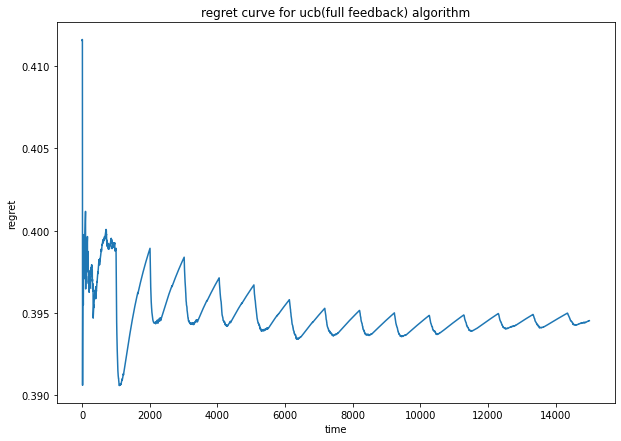

In [260]:
arm,mu,loss = ucb_full(df_org)
print('total loss:',loss)
evaluate_sto(arm,mu,'ucb(full feedback)')

In [0]:
def Tsap_full(df_org):
    loss = 0
    arm = np.zeros(df_org.shape[1],dtype = int)
    s = np.zeros(len(df_org))
    f = np.zeros(len(df_org))
    for t in range(df_org.shape[1]):
        samples = np.random.beta(s+1,f+1)
        idx = np.argmax(samples)
        arm[t] = idx
        loss += 1-df_org.iloc[idx,t]
        s[df_org.iloc[:,t]==1] += 1
        f[df_org.iloc[:,t]==0] += 1
    mu = (s+1)/(s+f+2)
    return arm,mu,loss

total loss: 8884.0
optimal loss: 8825.0


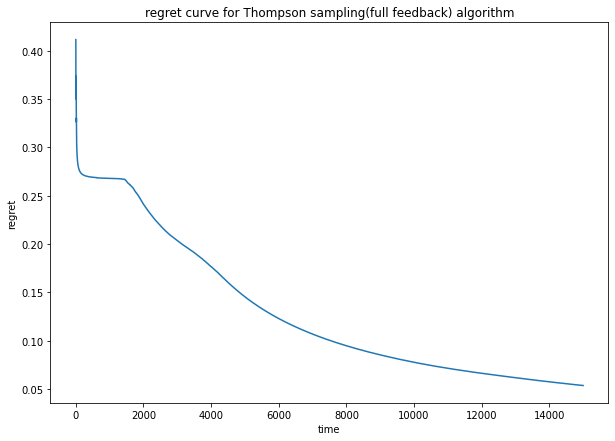

In [262]:
arm,mu,loss = Tsap_full(df_org)
print('total loss:',loss)
evaluate_sto(arm,mu,'Thompson sampling(full feedback)')

### non-stochastic method

In [0]:
def mulweights(df_org,best_movies = None):
    T = df_org.shape[1]
    K = df_org.shape[0]
    yita = 1/np.sqrt(T)
    weight = np.ones(K)
    loss = 0
    losses = np.zeros(T)
    pr_best_movies = np.zeros((10,T))
    for t in range(T):
        pr = weight/sum(weight)
        if best_movies!=None:
            pr_best_movies[:,t] = pr[best_movies] 
        idx = np.random.choice(np.arange(df_org.shape[0]), p=pr)
        loss += 1 - df_org.iloc[idx,t]
        weight = weight*(1 - yita*(1-df_org.iloc[:,t]))
        losses[t] = loss
    return losses,pr_best_movies

In [0]:
losses,_ = mulweights(df_org)
print('total loss:',losses[-1])
evaluation_adv(losses,'multiplicative weights(full feedback)')

total loss: 9642.0


## movie analysis

analyze how the recommendation probabilities for movies changes over time.

In [0]:
movies = df_org.sum(1).to_numpy()
best_movies = []
for i in range(10):
    best_movie = np.argmax(movies)
    best_movies.append(best_movie)
    movies = np.delete(movies,best_movie)

In [0]:
_,pr_best_movies = mulweights(df_org,best_movies)

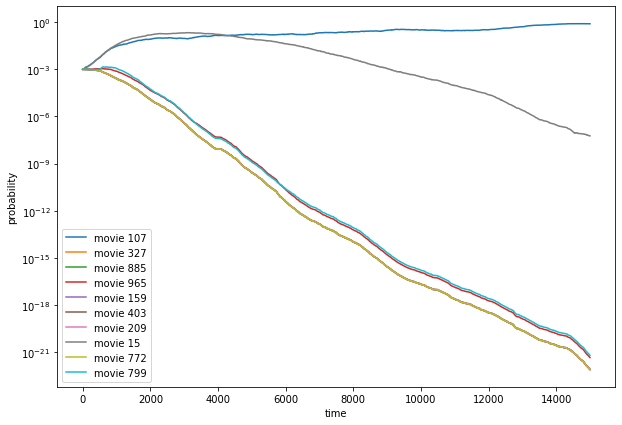

In [246]:
fig,ax = plt.subplots(figsize = (10,7))
for i in range(10):
    ax.plot(np.arange(pr_best_movies.shape[1]),pr_best_movies[i,:],label='movie '+str(best_movies[i]))
ax.set_xlabel('time')
ax.set_ylabel('probability')
ax.set_yscale("log")
ax.legend()
plt.show()

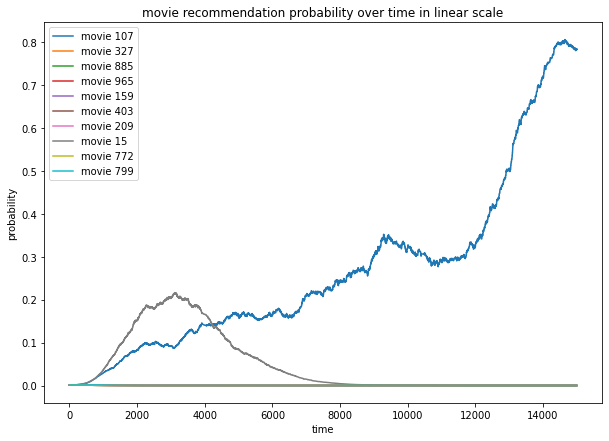

In [243]:
fig,ax = plt.subplots(figsize = (10,7))
for i in range(10):
    ax.plot(np.arange(pr_best_movies.shape[1]),pr_best_movies[i,:],label='movie '+str(best_movies[i]))
ax.set_xlabel('time')
ax.set_ylabel('probability')
ax.set_yscale("log")
ax.legend()
ax.set_yscale("linear")
ax.set_title('movie recommendation probability over time in linear scale')
plt.show()

# Module 2: Clusting

In [0]:
path = 'gdrive/My Drive/ESE 545/proj3/Movies.csv'
df = pd.read_csv(path,header=None)